# Chapter: State-Space Models: Efficient Modeling of MIMO Systems


## Topic: CVA modeling of glass furnaces

In [1]:
# import packages 
import matplotlib.pyplot as plt, numpy as np
from sklearn.preprocessing import StandardScaler
from sippy import system_identification as SysID

# package settings
plt.rcParams.update({'font.size': 20})

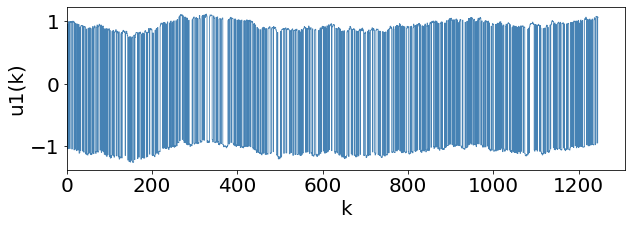

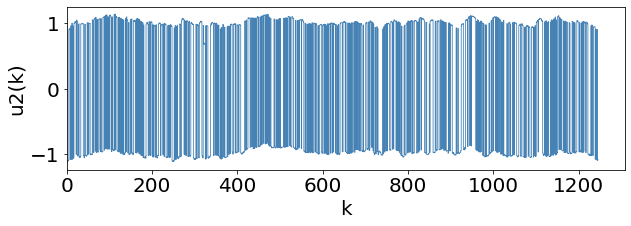

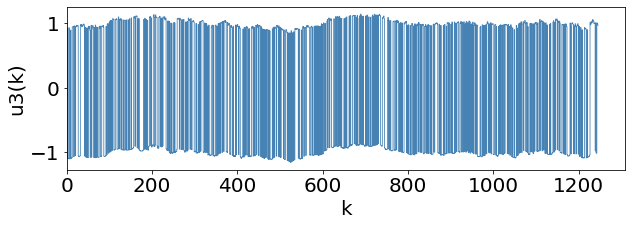

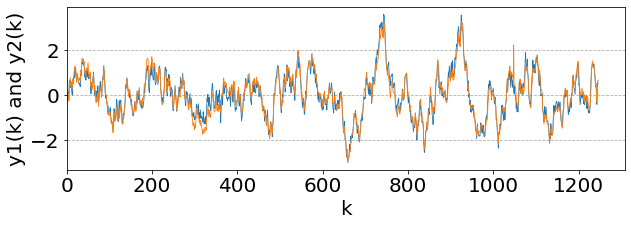

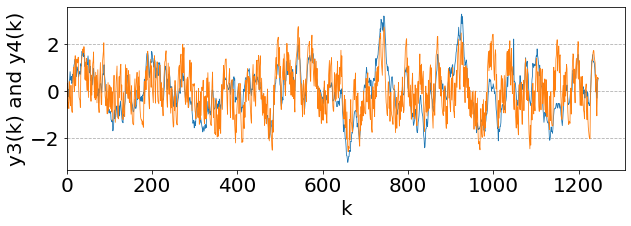

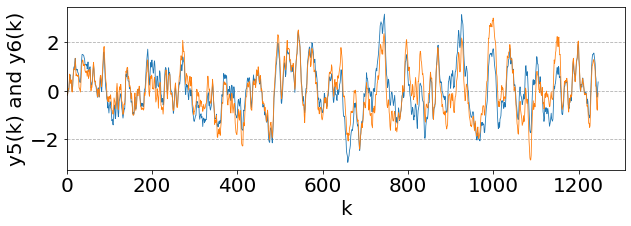

In [2]:
# read data and plot
data = np.loadtxt('glassfurnace.dat'); U = data[:,1:4]; Y = data[:,4:]

# plots
plt.figure(figsize=(10,3))
plt.plot(U[:,0], 'steelblue', linewidth=0.8, drawstyle='steps')
plt.ylabel('u1(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(10,3))
plt.plot(U[:,1], 'steelblue', linewidth=0.8, drawstyle='steps')
plt.ylabel('u2(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(10,3))
plt.plot(U[:,2], 'steelblue', linewidth=0.8, drawstyle='steps')
plt.ylabel('u3(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(10,3))
plt.plot(Y[:,:2], linewidth=0.8)
plt.ylabel('y1(k) and y2(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(10,3))
plt.plot(Y[:,2:4], linewidth=0.8)
plt.ylabel('y3(k) and y4(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(10,3))
plt.plot(Y[:,4:], linewidth=0.8)
plt.ylabel('y5(k) and y6(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

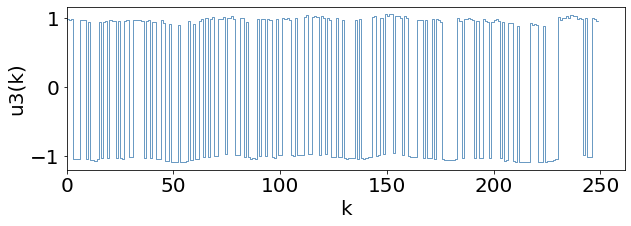

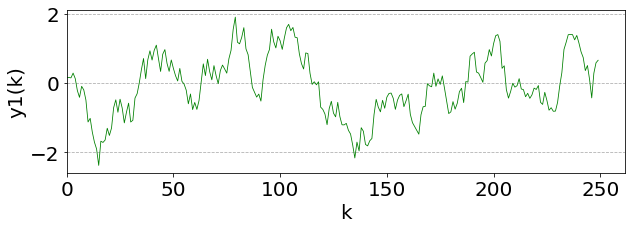

In [4]:
# split into training and test dataset
from sklearn.model_selection import train_test_split
U_train, U_test, Y_train, Y_test = train_test_split(U, Y, test_size=0.2, shuffle=False)

plt.figure(figsize=(10,3))
plt.plot(U_test[:,2], 'steelblue', linewidth=0.8, drawstyle='steps')
plt.ylabel('u3(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(10,3))
plt.plot(Y_test[:,0], 'g', linewidth=0.8)
plt.ylabel('y1(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [5]:
# center data before model fitting
U_scaler = StandardScaler(with_std=False); U_train_centered = U_scaler.fit_transform(U_train); U_test_centered = U_scaler.transform(U_test) 
Y_scaler = StandardScaler(with_std=False); Y_train_centered = Y_scaler.fit_transform(Y_train); Y_test_centered = Y_scaler.transform(Y_test) 

In [6]:
# fit CVA model
model = SysID(Y_train_centered, U_train_centered, 'CVA', IC='AIC', SS_f=20, SS_orders=[1,20])
print(model.G)

The suggested order is: n= 7
Kalman filter cannot be calculated
A = [[ 9.47074387e-01 -1.66667406e-01 -1.20905184e-01 -1.02187116e-01
      -2.54161750e-02 -5.39116124e-02 -7.49365601e-02]
     [-3.77455756e-03  9.18835892e-01 -1.15549108e-01 -1.64534179e-01
       3.47457034e-02 -1.76865101e-02 -1.57264983e-02]
     [ 1.82952726e-02  5.48834500e-03  9.08065964e-01 -1.52701915e-01
      -6.95432512e-04 -1.17937660e-02  1.72643596e-03]
     [-1.66165260e-02  6.56446730e-03 -1.38615675e-01  7.58085977e-01
       2.44555276e-02 -1.68696717e-02  4.19467811e-02]
     [-4.59887988e-02 -7.59553718e-02  7.83856989e-02  1.82482613e-01
       7.76519547e-01 -5.49571885e-02 -2.86765755e-02]
     [-2.27042429e-02 -3.51001910e-02  1.51423691e-02  3.87640339e-02
      -9.78131194e-02  9.51810450e-01 -7.79516447e-03]
     [ 3.63508198e-03 -7.38220396e-02 -3.54683362e-02 -9.92236084e-02
       2.50626788e-02 -1.20950496e-02  9.65557432e-01]]

B = [[-0.01230557 -0.01119786  0.0096632 ]
     [-0.0016720

In [5]:
# fit ARX model
ARXmodel = SysID(y_centered, u_centered, 'ARX', IC='AIC', na_ord=[1,10], nb_ord=[1,10], delays=[0,2])
print(ARXmodel.G)

suggested orders are: Na= 5 ; Nb= 5 Delay:  1

      0.09337 z^4 + 0.2207 z^3 + 0.1582 z^2 + 0.08027 z + 0.1065
----------------------------------------------------------------------
z^6 - 0.04928 z^5 - 0.0614 z^4 - 0.04642 z^3 - 0.06834 z^2 - 0.07631 z

dt = 1.0



In [7]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                 compare simulation responses vs measurements
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

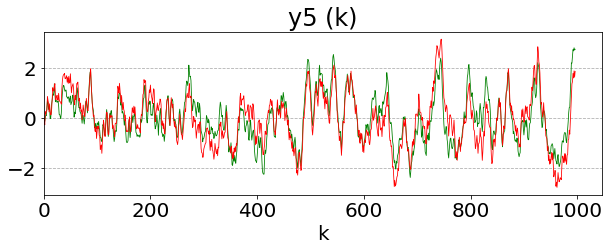

In [10]:
# compare simulation responses vs measurements on training data
from sippy import functionsetSIM as fsetSIM

Xid_train, Yid_train_centered = fsetSIM.SS_lsim_process_form(model.A, model.B, model.C, model.D, np.transpose(U_train_centered), model.x0)
Yid_train_centered = np.transpose(Yid_train_centered)

i = 5
plt.figure(figsize=(10,3))
plt.plot(Y_train_centered[:,i], 'g', linewidth=0.8)
plt.plot(Yid_train_centered[:,i], 'r', linewidth=0.8)
plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--'), plt.title('y%s (k)' %str(i))
plt.show()

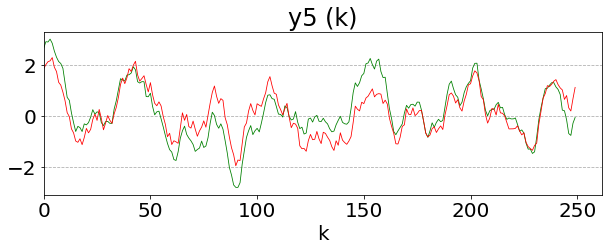

In [13]:
# compare simulation responses vs measurements on test data
Xid_test, Yid_test_centered = fsetSIM.SS_lsim_process_form(model.A, model.B, model.C, model.D, np.transpose(U_test_centered), Xid_train[:,-1, None])
Yid_test_centered = np.transpose(Yid_test_centered)

i = 5
plt.figure(figsize=(10,3))
plt.plot(Y_test_centered[:,i], 'g', linewidth=0.8)
plt.plot(Yid_test_centered[:,i], 'r', linewidth=0.8)
plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--'), plt.title('y%s (k)' %str(i))
plt.show()